This is an application of a decision tree classifier from scikit-learn to classify objects from the Sloan Sky Survey as stars, galaxies, or quasars(QSOs).  In this analysis, the u, g, r, i and z columns are combined in a PCA analysis.  This combined column is used to test whether an object is a star, galaxy, or quasar.

In [49]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
import os
pd.options.mode.chained_assignment = None


First we import all necesssary libraries.

In [50]:
os.chdir('/home/wln/Documents/python_programs/Astronomy_Datasets')

s = pd.read_csv("sloan_survey.csv")



sub = s[['class', 'u', 'g' , 'r' , 'i' ,'z']]


Then, we subset the necessary columns from the array

<Axes: xlabel='u', ylabel='g'>

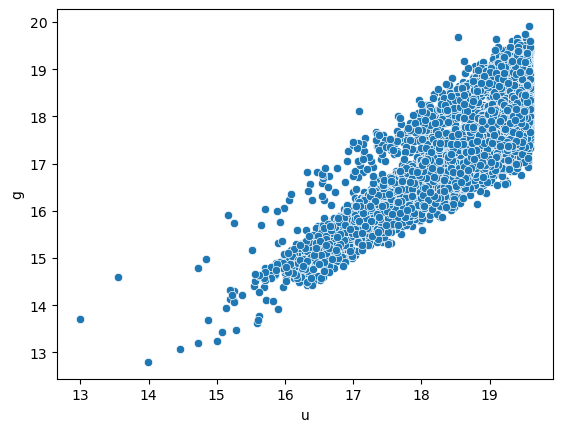

In [51]:

plt.figure()
sns.scatterplot(x='u',y='g',data=s)


<Axes: xlabel='u', ylabel='r'>

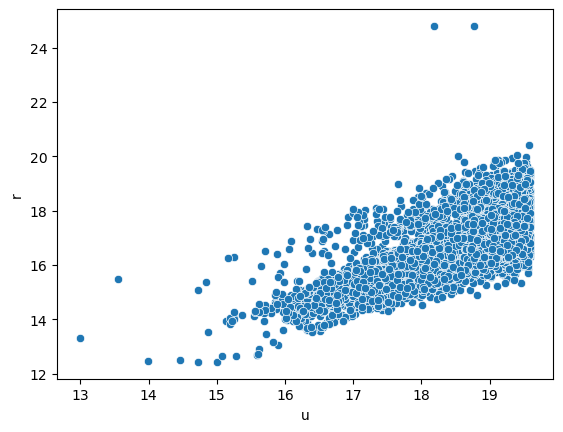

In [52]:
plt.figure()
sns.scatterplot(x='u',y='r',data=s)


<Axes: xlabel='u', ylabel='i'>

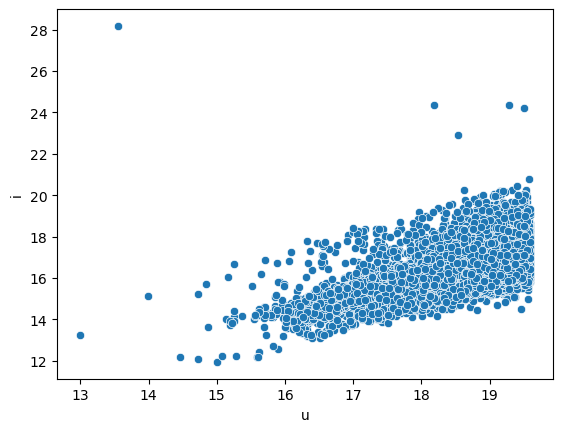

In [53]:
plt.figure()
sns.scatterplot(x='u',y='i',data=s)

<Axes: xlabel='u', ylabel='z'>

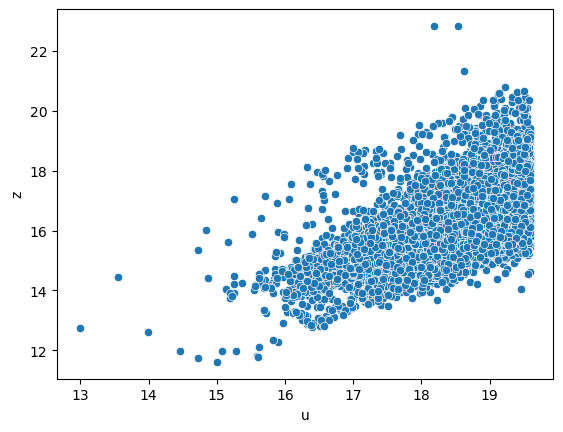

In [54]:
plt.figure()
sns.scatterplot(x='u',y='z',data=s)

These four graphs show a correlation between the five spectral components of each image.

In [40]:
pca = PCA(n_components=1)

sub['pca'] = PCA(n_components=1).fit_transform(sub[['u','g','r','i','z']])


This is where the PCA analysis occurs.

In [44]:
X = np.array(sub['pca'].fillna(0))
X = X[:, np.newaxis]

y = np.array(sub['class'])


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

This is where the train and test sets are created.  Ten percent of the dataset is set aside for testing.

In [45]:
D = DecisionTreeClassifier()

D.fit(X_train,y_train)

y_pred = D.predict(X_test)



In this section, the decision tree classifier is 
fitted on the training set, and used to predict y-values of the test set.

In [48]:
sub['pred_class'] = D.predict(X)



print(D.score(X, y))


print(D.score(X_test, y_test))

0.9505
0.505


This model performs slightly better than chance at predicting the labels of the test set.  
Further improvement will be needed.
